In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_data = pd.read_csv('Topic_Survey_Assignment.csv')
df_data.head(6)


,Data Science Topics,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [3]:
print (df_data.shape)

(6, 4)


In [10]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_data.columns)


True

In [11]:
df_data.set_index('Data Science Topics', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_data.head()

,Very interested,Somewhat interested,Not interested
Data Science Topics,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [12]:
print ('data dimensions:', df_data.shape)

data dimensions: (6, 3)


In [13]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [14]:
df_data.sort_values(by=['very interested'],ascending=True, inplace=True)


KeyError: 'very interested'

In [15]:
df_data.transpose()

Data Science Topics,Big Data (Spark / Hadoop),Data Analysis / Statistics,Data Journalism,Data Visualization,Deep Learning,Machine Learning
Very interested,1332,1688,429,1340,1263,1629
Somewhat interested,729,444,1081,734,770,477
Not interested,127,60,610,102,136,74


([], <a list of 0 Text yticklabel objects>)

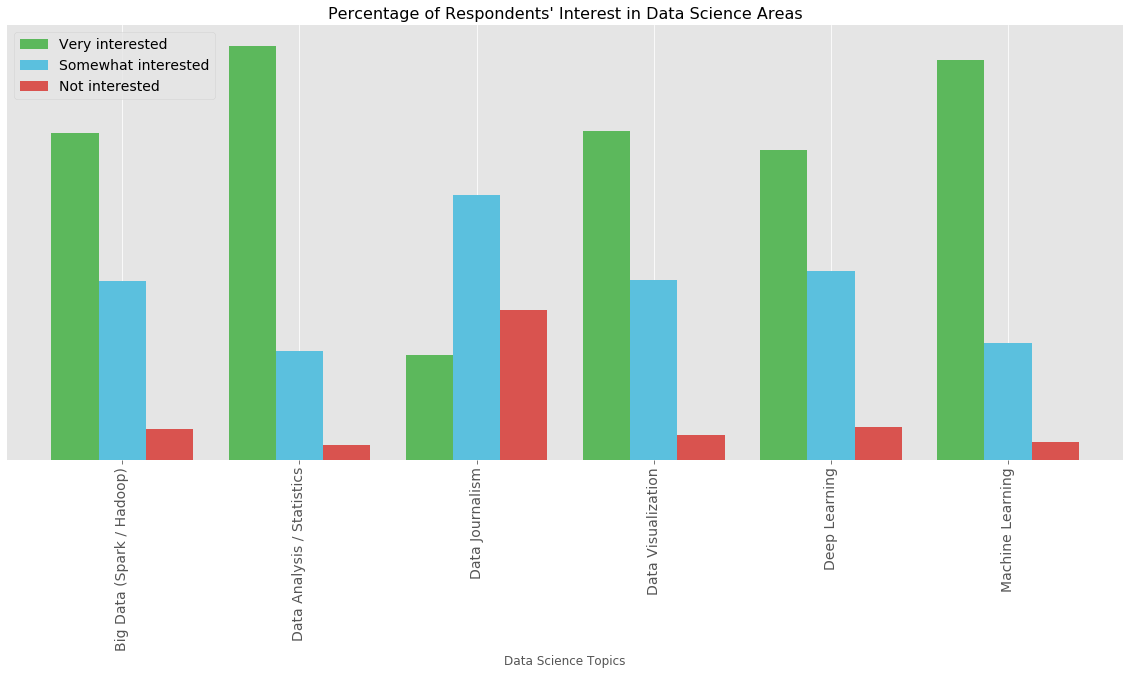

In [29]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']
df_data.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_data.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas", fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

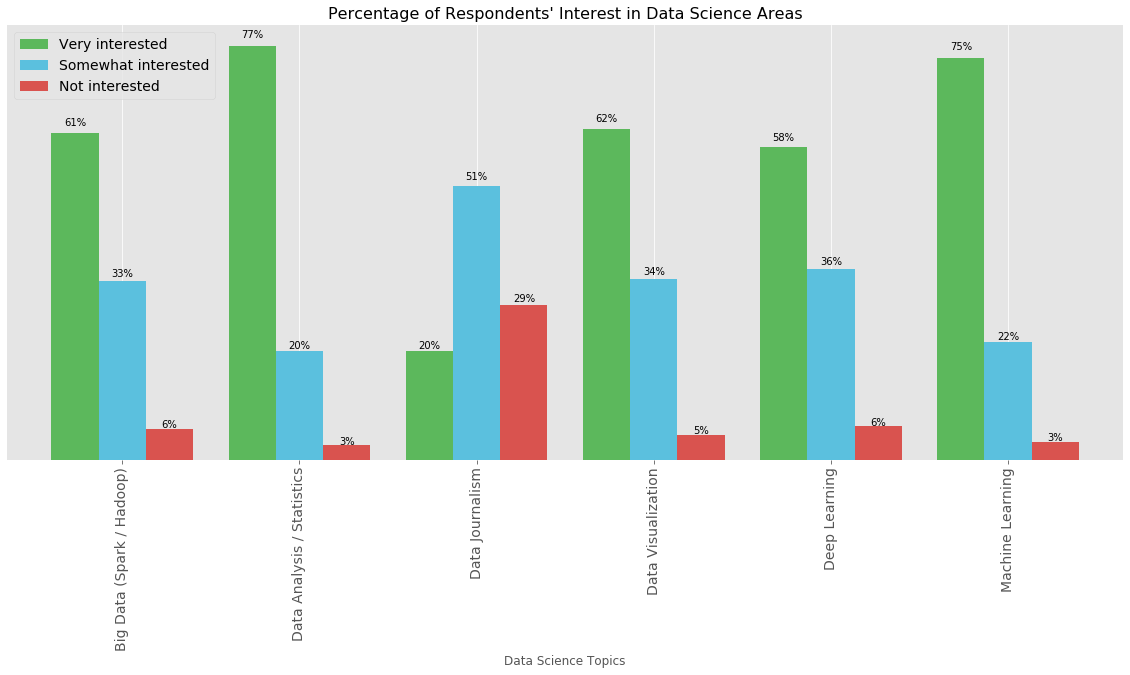

In [34]:


colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Normalize result
data_pct = df_data.div(df_data.sum(1), axis=0)

ax = data_pct.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_data.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')